# Random forest
Simple example

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import time

In [2]:
# Create a balanced random dataset
X, y = make_classification(n_samples=10000, 
                           n_features=50, 
                           n_classes=2, 
                           weights=[0.5, 0.5], 
                           random_state=2024)

# Division into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2024)

print(f'X_train: {X_train.shape}; X_test: {X_test.shape}; ')
print(f'y_train: (1){y_train.sum()}; y_test: (1){y_test.sum()}; ')

X_train: (8000, 50); X_test: (2000, 50); 
y_train: (1)3994; y_test: (1)999; 


In [3]:
# Create an instance of RandomForestClassifier
rf_model = RandomForestClassifier(random_state=2024)

# Train the model using your training data
rf_model.fit(X_train, y_train)

# Make predictions on test data
predictions = rf_model.predict(X_test)

# Calculating AUC on test data
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
auc = round(roc_auc_score(y_test, y_pred_proba),3)
print(f"AUC: {auc}")

AUC: 0.972


In [4]:
# default parameters
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2024,
 'verbose': 0,
 'warm_start': False}

# Hyperparameters
The hyperparameters in random forest are either used to increase the predictive power of the model or to make the model faster. Let’s look at some basic hyperparameters of sklearns built-in random forest function.

In [5]:
def rf_calc(params):
    """
    Calculates the AUC score and time taken by a 
    RandomForestClassifier model.
    """
    start_time = time.time()
    
    # Build RandomForestClassifier based on imported parameters
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    
    # Predict probabilities for the positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate AUC score
    auc = round(roc_auc_score(y_test, y_pred_proba), 3)

    # Calculate the time taken
    t = round(time.time() - start_time, 2)
    
    # return metric auc and time 
    return auc, t

In [6]:
def chart_for_param_dict(d, param_name, min_auc_lim=0.9):
    """
    Creates a plot showing AUC values and corresponding 
    training times for different parameter values.
    """
    # Extracting data from dictionary and sorting by keys
    param_keys = sorted(list(d.keys()))
    auc_values = [d[depth]['auc'] for depth in param_keys]
    time_values = [d[depth]['time'] for depth in param_keys]

    # Creating the plot with specified figure size
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plotting AUC values against the range of indices
    bars = ax1.bar(range(len(param_keys)), auc_values, color='gray', label='AUC')
    ax1.set_xlabel('Index')
    ax1.set_ylabel('AUC')
    ax1.set_xticks(range(len(param_keys)))  
    ax1.set_xticklabels(param_keys)  
    ax1.tick_params('y')
    ax1.set_ylim(min_auc_lim, 1.01)

    # Creating secondary y-axis for time values
    ax2 = ax1.twinx()
    ax2.plot(range(len(param_keys)), time_values,
             color='crimson', label='Time', marker='o')
    ax2.set_ylabel('Time (sec)', color='crimson')
    ax2.tick_params('y', colors='crimson')

    # Adding legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax1.legend(lines, labels, loc='upper left')

    # Adding title
    plt.title(f'AUC and Time for {param_name} parameter')

    # Adding values on top of each bar
    for bar, value in zip(bars, auc_values):
        ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001, f'{value:.3f}',
                 ha='center', va='bottom', rotation=45, fontsize=8)

    # Display the plot
    plt.show()

### n_estimators

For n_estimators:1 auc=0.863 in 0.05 sec.
For n_estimators:5 auc=0.952 in 0.2 sec.
For n_estimators:10 auc=0.964 in 0.4 sec.
For n_estimators:20 auc=0.968 in 0.77 sec.
For n_estimators:30 auc=0.97 in 1.15 sec.
For n_estimators:40 auc=0.971 in 1.53 sec.
For n_estimators:50 auc=0.972 in 1.9 sec.
For n_estimators:75 auc=0.972 in 2.85 sec.
For n_estimators:100 auc=0.972 in 3.83 sec.
For n_estimators:150 auc=0.973 in 6.16 sec.
For n_estimators:200 auc=0.973 in 7.83 sec.
For n_estimators:250 auc=0.973 in 9.67 sec.
For n_estimators:300 auc=0.974 in 11.61 sec.
For n_estimators:400 auc=0.974 in 15.63 sec.
For n_estimators:500 auc=0.974 in 19.8 sec.
For n_estimators:750 auc=0.974 in 29.36 sec.
For n_estimators:1000 auc=0.974 in 39.33 sec.


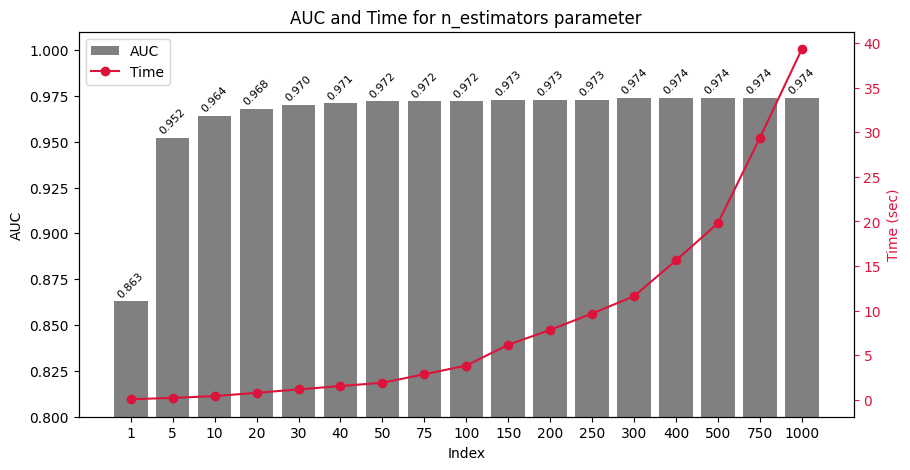

In [7]:
param_name = 'n_estimators'

results = {}
for param in [1, 5, 10, 20, 30, 40, 50, 75, 100,
              150, 200, 250, 300, 400, 500, 750, 1000]:
    # change params
    params = {
        param_name:param,
        'random_state': 2024,
    }
    
    # build model and save auc & time
    auc, t = rf_calc(params)
    results[param] = {'auc': auc, 'time': t}
    print(f'For {param_name}:{param} auc={auc} in {t} sec.')
    
# Create chart :)
chart_for_param_dict(results, param_name, min_auc_lim=0.8)

### max_depth

For max_depth:1 auc=0.948 in 0.64 sec.
For max_depth:2 auc=0.963 in 1.09 sec.
For max_depth:3 auc=0.966 in 1.57 sec.
For max_depth:4 auc=0.966 in 2.0 sec.
For max_depth:5 auc=0.967 in 2.52 sec.
For max_depth:6 auc=0.97 in 2.91 sec.
For max_depth:7 auc=0.97 in 3.23 sec.
For max_depth:8 auc=0.972 in 3.73 sec.
For max_depth:9 auc=0.971 in 3.96 sec.
For max_depth:10 auc=0.971 in 4.31 sec.
For max_depth:11 auc=0.972 in 4.49 sec.
For max_depth:12 auc=0.972 in 4.75 sec.
For max_depth:13 auc=0.971 in 5.03 sec.
For max_depth:14 auc=0.973 in 5.23 sec.
For max_depth:15 auc=0.973 in 5.39 sec.
For max_depth:16 auc=0.973 in 5.77 sec.
For max_depth:17 auc=0.973 in 5.76 sec.
For max_depth:18 auc=0.973 in 5.69 sec.
For max_depth:19 auc=0.974 in 5.72 sec.
For max_depth:20 auc=0.973 in 5.86 sec.


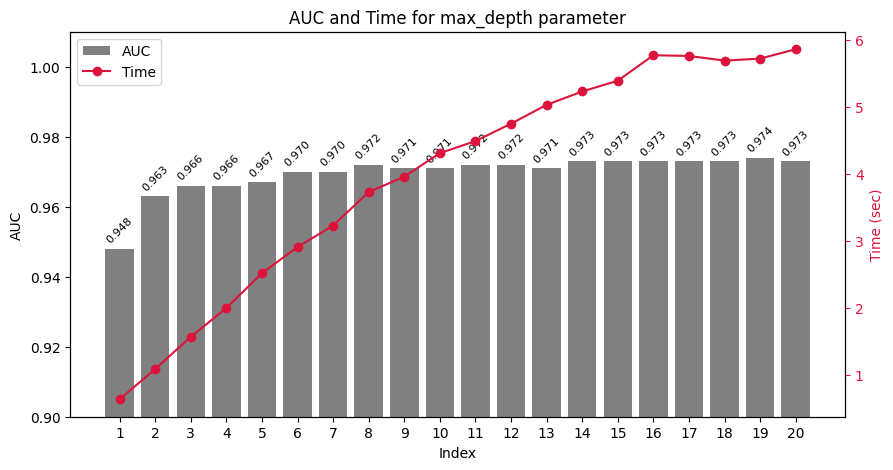

In [8]:
param_name = 'max_depth'

results = {}
for param in range(1, 21):
    # change params
    params = {
        param_name:param,
        'n_estimators': 150,
        'random_state': 2024,
    }
    
    # build model and save auc & time
    auc, t = rf_calc(params)
    results[param] = {'auc': auc, 'time': t}
    print(f'For {param_name}:{param} auc={auc} in {t} sec.')
    
# Create chart :)
chart_for_param_dict(results, param_name)

### min_samples_split

For min_samples_split:2 auc=0.97 in 2.84 sec.
For min_samples_split:3 auc=0.97 in 2.82 sec.
For min_samples_split:4 auc=0.97 in 2.86 sec.
For min_samples_split:5 auc=0.97 in 2.77 sec.
For min_samples_split:10 auc=0.97 in 2.78 sec.
For min_samples_split:20 auc=0.97 in 2.78 sec.
For min_samples_split:50 auc=0.969 in 2.78 sec.
For min_samples_split:100 auc=0.969 in 2.76 sec.
For min_samples_split:200 auc=0.968 in 2.73 sec.
For min_samples_split:500 auc=0.967 in 2.57 sec.
For min_samples_split:750 auc=0.966 in 2.49 sec.
For min_samples_split:1000 auc=0.966 in 2.47 sec.
For min_samples_split:2000 auc=0.965 in 1.82 sec.


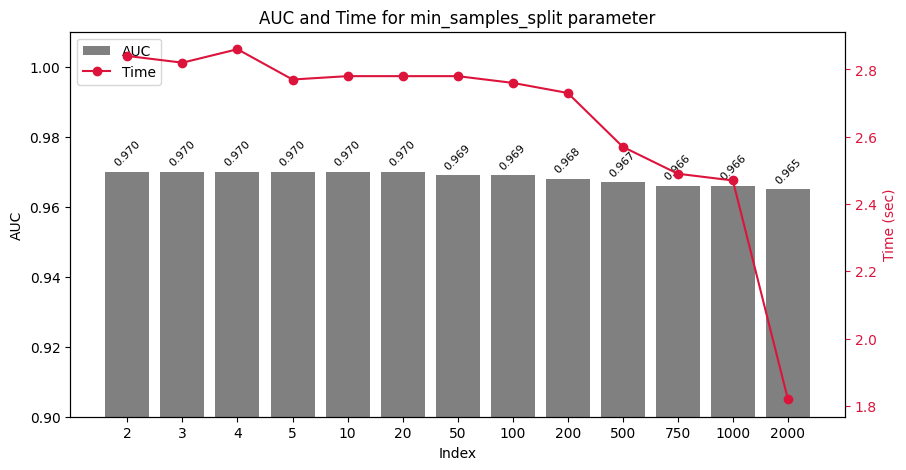

In [9]:
param_name = 'min_samples_split'

results = {}
for param in [2, 3, 4, 5, 10, 20, 50, 100, 200, 500, 750, 1000, 2000]:
    # change params
    params = {
        param_name:param,
        'n_estimators': 150,
        'max_depth': 6,
        'random_state': 2024,
    }
    
    # build model and save auc & time
    auc, t = rf_calc(params)
    results[param] = {'auc': auc, 'time': t}
    print(f'For {param_name}:{param} auc={auc} in {t} sec.')
    
# Create chart :)
chart_for_param_dict(results, param_name)

### min_samples_leaf

For min_samples_leaf:1 auc=0.97 in 2.82 sec.
For min_samples_leaf:2 auc=0.969 in 2.89 sec.
For min_samples_leaf:3 auc=0.969 in 2.75 sec.
For min_samples_leaf:4 auc=0.969 in 2.86 sec.
For min_samples_leaf:5 auc=0.969 in 2.82 sec.
For min_samples_leaf:10 auc=0.969 in 2.85 sec.
For min_samples_leaf:20 auc=0.969 in 2.86 sec.
For min_samples_leaf:50 auc=0.969 in 2.65 sec.
For min_samples_leaf:100 auc=0.968 in 2.56 sec.
For min_samples_leaf:200 auc=0.965 in 2.2 sec.
For min_samples_leaf:500 auc=0.963 in 1.55 sec.
For min_samples_leaf:750 auc=0.962 in 1.28 sec.
For min_samples_leaf:1000 auc=0.961 in 1.04 sec.
For min_samples_leaf:2000 auc=0.94 in 0.56 sec.


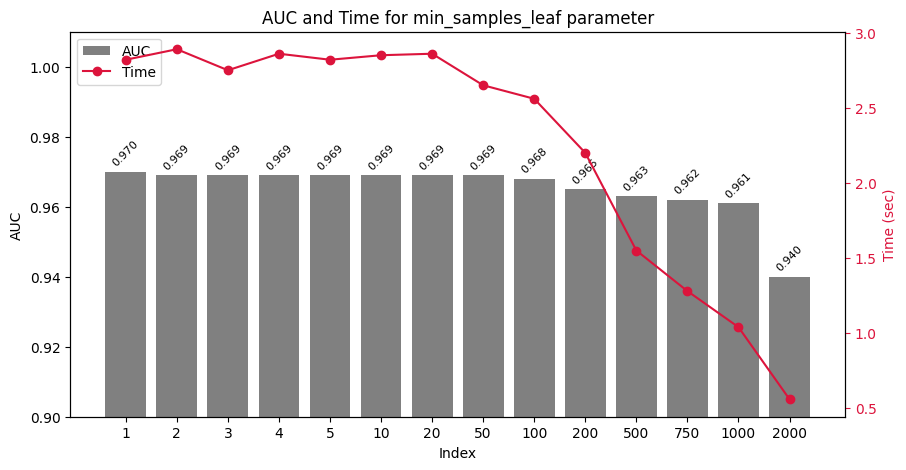

In [10]:
param_name = 'min_samples_leaf'

results = {}
for param in [1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500, 750, 1000, 2000]:
    # change params
    params = {
        param_name:param,
        'n_estimators': 150,
        'max_depth': 6,
        'min_samples_split': 20,
        'random_state': 2024,
    }
    
    # build model and save auc & time
    auc, t = rf_calc(params)
    results[param] = {'auc': auc, 'time': t}
    print(f'For {param_name}:{param} auc={auc} in {t} sec.')
    
# Create chart :)
chart_for_param_dict(results, param_name)

# Feature importance
Free information from algorithm

In [11]:
import pandas as pd

model = RandomForestClassifier(
    n_estimators=150,
    max_depth=6, 
    min_samples_split=20,
    random_state=2024)

model.fit(X_train, y_train)

# Create a list of feature names if available
feature_names = [f"Feature {i}" for i in range(1, X_train.shape[1]+1)] 

# Calculate Feature Importance
feature_importance = model.feature_importances_

# Create a DataFrame to store feature importance data
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by Feature Importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Add a cumulative importance column
feature_importance_df['Cumulative Importance'] = feature_importance_df['Importance'].cumsum()

# Display sorted features and their importance - top 10
feature_importance_df.head(10)

,Feature,Importance,Cumulative Importance
0,Feature 25,0.376867,0.376867
1,Feature 36,0.298308,0.675175
2,Feature 44,0.233604,0.908779
3,Feature 18,0.048062,0.956841
4,Feature 38,0.001496,0.958337
5,Feature 4,0.001345,0.959683
6,Feature 17,0.001342,0.961025
7,Feature 22,0.001307,0.962332
8,Feature 24,0.001265,0.963597
9,Feature 50,0.001253,0.964850


In [12]:
# Bottom 5 - last one give 100% :)
feature_importance_df.tail(5)

,Feature,Importance,Cumulative Importance
45,Feature 28,0.000706,0.997561
46,Feature 15,0.000670,0.998230
47,Feature 1,0.000641,0.998871
48,Feature 42,0.000638,0.999509
49,Feature 35,0.000491,1.000000
